<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_76_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 76: PCA - II, Covariance and Vectors

---



In the previous classes, we learned one of the applications of unsupervised learning known as Clustering. These algorithms partition the dataset into clusters of similar items, thereby discovering hidden patterns in the data.

Going forward, we will start exploring another application of unsupervised learning called **Dimensionality Reduction**. This technique will help us to reduce the number of features (also known as *dimensions*) in the dataset. A popular dimensionality reduction technique that we will explore is **Principal Component Analysis (PCA)**.



---

#### Problem Statement

We are given a dataset that comprises information on physical properties of wheat kernels belonging to three different varieties of wheat: Kama, Rosa, and Canadian.  

**Wheat** is a grass widely cultivated for its seed.
The **wheat kernel** is the seed from which the wheat plant grows. The figure below shows some physical features of wheat kernel:



<center>
  <img src="https://drive.google.com/uc?export=view&id=1bpVu-3se4Clrt1dNMPoNflpBRsMXD9Yg"width="700" />
</center>


This dataset consists of following attributes of a wheat kernel:

|Attribute|Attribute Information|
|-|-|
|`A`|Area ($\text{mm}^2$)|
|`P`|Perimeter (mm)|
|`C`|Compactness is calculated as $\frac{4 \times \pi \times A}{P^2}$|
|`LK`| Length of Kernel (mm)|
|`WK`|Width of Kernel (mm)|
|`A_Coef`|Asymmetry Coefficient (a measure of asymmetry in the kernel shape)|
|`LKG`|Length of Kernel Groove (mm)|
|`target`|Kernel Type (`0` = Kama, `1` = Rosa, `2` = Canadian)|


**Dataset credits:** https://archive.ics.uci.edu/ml/datasets/seeds

**Citation:** Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.

Let us implement PCA on this dataset to understand and visualise the basic structure, patterns, and relationships of the dataset.






---

#### Activity 1: Import Modules and Read the Data

Let's import the necessary Python modules, read the data from a csv file to create a Pandas DataFrame and go through the necessary data-cleaning process (if required).




In [ ]:
# Import the Python modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
wheat_df = pd.read_csv('/content/wheat_data.csv')
wheat_df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


Rename the following columns so that they are easy to interpret using `rename()` function of the DataFrame:
- `A` to `area`
- `P` to `perimeter`
- `C` to `compactness`
- `LK` to `kernel_length`
- `WK` to `kernel_width`
- `A_Coef` to `asymmetry_coefficient`
- `LKG` to `kernel_groove_length`



In [ ]:
a = { "a" : 1, "b": 2, "a":3}
a

{'a': 3, 'b': 2}

In [ ]:
#  Rename the columns for better understandability
wheat_df.rename(columns = {'A': 'area', 'P': 'perimeter', 'C': 'compactness',
                            'LK': 'kernel_length', 'WK': 'kernel_width',
                            'A_Coef': 'asymmetry_coefficient', 'LKG':'kernel_groove_length'}, inplace = True)
wheat_df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


Next, find out the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.

In [ ]:
#Get the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.
wheat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel_length          210 non-null    float64
 4   kernel_width           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   kernel_groove_length   210 non-null    float64
 7   target                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


The dataset consists of $210$ entries and no missing (or null) values. All the columns are numerical, hence feature encoding is not needed.

Let's perform some basic EDA on the dataset.

---

#### Activity 2: Exploratory Data Analysis

Let us determine whether there are any anomalies or irregularities in the dataset.

**1. Kernel Length vs Kernel Width**

The width of a wheat kernel must always be less than the length of the kernel. Let us extract the instances where `kernel_width` is greater than `kernel_length`.

In [ ]:
#Check for anomalies in 'kernel_width' and 'kernel_length'.
wheat_df[wheat_df['kernel_width'] > wheat_df['kernel_length']]

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target


As you can observe that there are no instances where `kernel_width` is greater than `kernel_length`.

**2. Kernel Groove Length vs Kernel Length**

The length of kernel groove must be less than the kernel length. Let us find out the instances where `kernel_groove_length` is greater than `kernel_length`.

In [ ]:
#  Check for anomalies in kernel_groove_length and kernel_length.
print("Number of rows having kernel groove length > kernel length =",
      wheat_df[wheat_df['kernel_groove_length'] > wheat_df['kernel_length']].shape[0], "\n")

wheat_df[wheat_df['kernel_groove_length'] > wheat_df['kernel_length']]

Number of rows having kernel groove length > kernel length = 15 



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
80,16.53,15.34,0.8823,5.875,3.467,5.532,5.880,1
85,18.27,16.09,0.8870,6.173,3.651,2.443,6.197,1
86,18.88,16.26,0.8969,6.084,3.764,1.649,6.109,1
97,18.98,16.57,0.8687,6.449,3.552,2.144,6.453,1
98,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
106,18.85,16.17,0.9056,6.152,3.806,2.843,6.200,1
134,15.56,14.89,0.8823,5.776,3.408,4.972,5.847,1
139,16.23,15.18,0.8850,5.872,3.472,3.769,5.922,1
150,11.83,13.23,0.8496,5.263,2.840,5.195,5.307,2
154,11.36,13.05,0.8382,5.175,2.755,4.048,5.263,2


Here we see that there are instances where `kernel_groove_length` is greater than `kernel_length`. Although not physically possible this may be due to error/noise in measurement.

Let's remove these anomalies from the dataset and obtain a new DataFrame which consists of only those rows where `kernel_groove_length` is less than `kernel_length`.

In [ ]:
# Obtain a clean DataFrame
clean_df = wheat_df[wheat_df['kernel_groove_length'] < wheat_df['kernel_length']]
clean_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


Now the DataFrame `clean_df` has data points of wheat kernels where there are no physical discrepancies for `kernel_length` and `kernel_groove_length`.

Let's validate the  values in the `compactness` column using the formula provided in the dataset description. To do this, let us first copy our DataFrame `clean_df` to a new DataFrame `validation_df` using the `copy()` function.

**Syntax of `copy()` function:** `DataFrame.copy()`


In [ ]:
# Create a duplicate copy of the 'clean_df' DataFrame.
validation_df = clean_df.copy()
validation_df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0



As per dataset description, the compactness of a wheat kernel is calculated as:

\begin{align}
\frac{4 \times \pi \times A}{P^2}
\end{align}

Where,
- $A$ is the area of the kernel
- $P$ is the perimeter of the kernel
- $\pi$ is a constant value equal to $3.14159$ approx.

Add a new column `compactness_formula` to `validation_df` DataFrame which contains the compactness values of wheat kernels calculated using the above formula.

**Note:** To obtain the $\pi$  value, import  `math` module and use `math.pi` constant.

In [ ]:
np.pi

3.141592653589793

In [ ]:
#  Calculate the compactness value using the given formula
import math
validation_df['compactness_formula'] = (validation_df['area'] * 4 * (math.pi)) / (validation_df['perimeter'] ** 2)
validation_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target,compactness_formula
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,0.870756
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,0.880833
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,0.904524
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,0.894995
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,0.902631
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2,0.879156
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,0.850664
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2,0.888960
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2,0.852621


Observe the values of the `compactness` column and `compactness_formula` column in `validation_df` DataFrame. It seems like the values of the `compactness` column are rounded from the formula.

Let's see the instances where the difference in these two columns is more than $0.01$ (considering 1% rounding off error).

In [ ]:
#  Check for anomalies in 'compactness' feature
validation_df[validation_df['compactness'] - validation_df['compactness_formula'] > 0.01]

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target,compactness_formula


You may observe that there are no data points which exhibit compactness calculation error. Hence, we can say that there are no anomalies in `compactness` column.

As our dataset is now free from all the anomalies and irregularities, let us perform some data visualisation.

---

#### Activity 3: Data Visualisation


Let us now check the feature distribution and outliers.


Use `boxplot()` function of `seaborn` module and pass `target` as $x$-axis values and the other features as $y$-axis values to create boxplots for all the features. Use subplots to display these boxplots.

**Syntax for `boxplot()` function:** `seaborn.boxplot(x = None, y = None, data = None, ax = None)`

Where,
 - `x` and `y` are features of the dataset.
 - `data` is the DataFrame.
 - `ax` is the axes object.





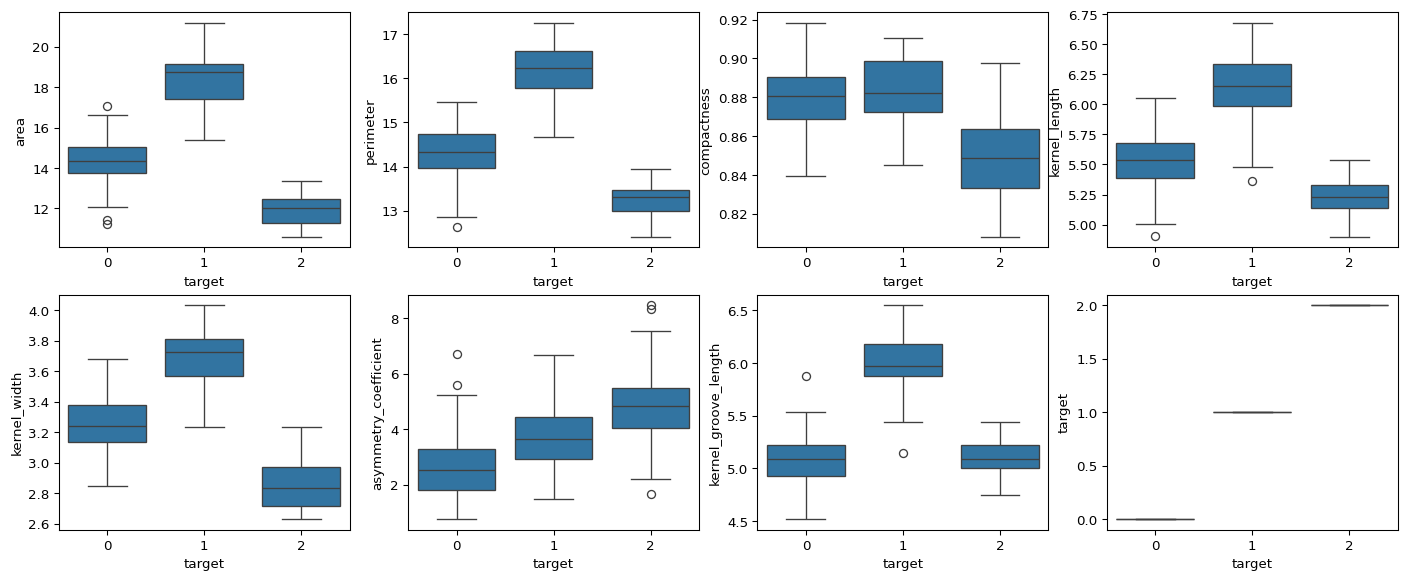

In [ ]:
# Create boxplots for 'clean_df' columns using subplot.
fig, axis = plt.subplots(nrows = 2, ncols = 4, figsize = (18, 7), dpi = 96, sharex = False)
count = 0

for i in range(0, 2):
  for j in range (0, 4):
    column = clean_df.iloc[:, count]    # Fetching the current column and all rows of that column.
    sns.boxplot(x = 'target', y = column, data = clean_df, ax = axis[i, j])
    count = count + 1

plt.show()

Here we see the majority of the features are distributed throughout the varieties of wheat, and there are no significant outliers for any of the features.

Next, we will try to understand the correlation between variables. For this, compute the correlation matrix among all the variables and plot a heat map.

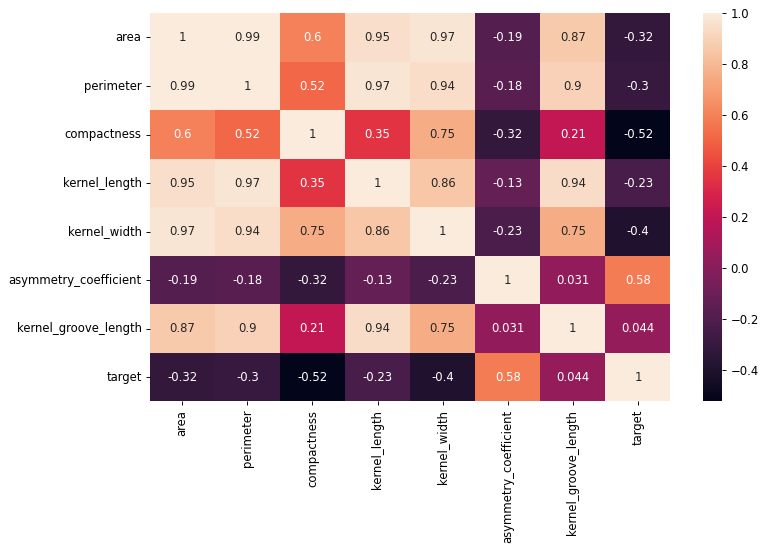

In [ ]:
# Let's check the correlation of features
corr_df = clean_df.corr()
plt.figure(figsize = (10, 6), dpi = 84)
sns.heatmap(corr_df, annot = True)
plt.show()

From the above correlation heatmap, we can observe that `asymmetry_coefficient`, `compactness`, and `kernel_width` exhibit moderate correlation  with `target`.

Let us create an interactive 2D scatter plot using the `scatter()` function of `plotly.express` module. Plot highly correlated features `asymmetry_coefficient` and `compactness` on $x$-axis and $y$-axis respectively and colour code the data points with respect to the wheat varieties.



In [ ]:
#Scatterplot for wheat variety using 2 features

import plotly.express as px
fig = px.scatter(clean_df, x = 'asymmetry_coefficient',
                 y = 'compactness', color = 'target',
                 color_continuous_scale = 'bluered')
fig.show()

The above scatter plot does not clearly distinguish between different wheat variety. Moreover, this scatter plot does not convey information on other features. Let us use one more feature `kernel_width` which has high correlation with `target` to visualise this dataset.


Create an interactive 3D scatter plot using the `scatter_3d()` function of `plotly.express` module. Plot the three features `asymmetry_coefficient`, `compactness` and `kernel_width` on  $x$-axis, $y$-axis and $z$-axis respectively and colour code the data points with respect to the wheat varieties.


In [ ]:
# Scatterplot for wheat variety using 3 features

fig = px.scatter_3d(clean_df, x = 'asymmetry_coefficient', y = 'compactness', z = 'kernel_width',
                           color = 'target', color_continuous_scale = 'bluered')
fig.show()

From the above 3D scatter plot, you may observe that after adding `kernel_width` dimension, visualisation is now better. The feature `kernel_width` gave us a  good separation of wheat varieties.

*What if we want to add more than 3 features or dimensions to this scatter plot?*

We still have other features like `kernel_length`, `area`, `kernel_groove_length`, and `perimeter` that can help us to improve visualisation and obtain better data interpretation. But, **can you imagine a scatter plot  having more than $3$ dimensions or axis?** 🤔


The answer is **no**! Hence, we need a technique that can transform or reduce our  7-dimensional dataset into a low dimensional dataset such as 2D or 3D. Such low dimensional datasets are easier to plot and can be easily interpreted. This technique is known as **Dimensionality Reduction**. There are various dimensionality reduction techniques out of which we will explore only **Principal Component Analysis (PCA)**.

Before diving into PCA, let us understand in more detail why there is a need for dimensionality reduction in machine learning.



---

#### Curse of Dimensionality

**Dimension** refers to the number of features associated with a dataset. Several real-world Machine Learning problems involve hundreds or even tens of thousands of features. Not only does this make training extremely slow, but also finding optimal solution becomes harder. This problem is often referred to as the **curse of dimensionality.**

To avoid the curse of dimensionality, we need a technique to reduce the number of dimensions while keeping the useful information that is provided. This is achieved using dimensionality reduction.

Following are the benefits of performing dimensionality reduction:
1. It reduces the time and storage space required.
2. It becomes easier to visualise the data when reduced to very low dimensions such as 2D or 3D.
3. It is also helpful in the pre-processing or feature engineering stages  as the machine learning model needs to deal only with the most relevant information rather than all features.

Consider a sphere in a 3D space. We can project the sphere into lower 2D space into a circle
with some information loss (the value for the $z$ coordinate) but still retaining much of the
information that describes its original shape. This is exactly what we will achieve by using PCA.

<center>
<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/b7fa3b5c-6cc9-498c-815b-1b43c85c8f77.png"/>

`Fig: Transformation of 3D sphere into a 2D space`</center>

Let us first apply PCA using `sklearn` library to the wheat kernel dataset and observe how the 7-dimensional dataset is reduced to lower dimensional data.

---

#### Activity 4: Applying PCA

Principal Components Analysis (PCA) is a dimensionality reduction technique. This algorithm transforms the features of a dataset into a new set of features called **Principal Components**. By doing this, a major chunk of the information of the entire dataset is effectively compressed in fewer columns. We will learn more about principal components in the next class.

Let us first implement PCA using `sklearn` library and  then we will discuss the complete concept behind the PCA algorithm in the later section.

Before applying PCA, let us obtain a new DataFrame containing only feature variables.

In [ ]:
#  Create a DataFrame having only feature variables
# Drop the 'target' variable
wheat_features = clean_df.drop(['target'], axis = 1)
wheat_features.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


Let us normalise the above DataFrame before performing PCA so that all the columns have the same mean and variance.

In [ ]:
# Normalise the column values.
# Import 'StandardScaler' from sklearn
from sklearn.preprocessing import StandardScaler

# Make an object for StandardScaler
standard_scaler = StandardScaler()

# Fit and Transform the DataFrame
scaled_values = standard_scaler.fit_transform(wheat_features)
wheat_scaled = pd.DataFrame(scaled_values)
wheat_scaled.columns = wheat_features.columns
wheat_scaled.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,0.137294,0.211526,-0.012130,0.307200,0.129752,-0.964557,-0.343965
1,0.005179,0.002040,0.413828,-0.169903,0.185749,-1.762019,-0.887953
2,-0.199947,-0.370380,1.421788,-0.770278,0.196415,-0.647693,-1.157887
3,-0.356398,-0.486762,1.021134,-0.694946,0.308408,-0.939367,-1.199098
4,0.443244,0.327907,1.354309,0.067507,0.796380,-1.538624,-0.436690


**PCA projection to 2D:**

Let us now apply PCA on the above scaled DataFrame to project the original 7-dimensional data into 2 dimensions. Follow the steps given below to achieve this:

1. Import `PCA` from `sklearn.decomposition` module.
2. Pass the number of components/dimensions to the PCA constructor using the following syntax:

  **Syntax:** `PCA(n_components = None)`

  Where, `n_components` is the number of components to keep. As we are projecting the dataset into  2 dimensions, `n_components` would be `2` in this case.

3. Call the `fit_transform()` function on PCA object to obtain the new set of features or principal components. These components are nothing but the new set of features or columns obtained after PCA transformation.

In [ ]:
#Transform dataset into 2D using PCA
# Import 'PCA' module from sklearn
from sklearn.decomposition import PCA

# Perform PCA with n_components = 2
pca = PCA(n_components = 2)
pca_2d = pca.fit_transform(wheat_scaled)
pca_2d

array([[ 0.2980831 , -0.74577813],
       [-0.05153028, -1.8671203 ],
       [-0.49951248, -1.86688915],
       [-0.63659541, -1.88533626],
       [ 1.06366126, -2.04559645],
       [-0.37340412, -1.5952673 ],
       [-0.15324135, -0.3998879 ],
       [-0.45739298, -1.34735748],
       [ 1.76525944, -0.29185592],
       [ 1.42547587, -0.99302611],
       [ 0.08267765,  0.46000697],
       [-0.61565262, -1.50577477],
       [-0.94939055, -0.82789433],
       [-0.93907419, -0.81981468],
       [-1.03621835, -0.90328477],
       [-0.53072559, -1.02386397],
       [-0.7962988 , -1.11234625],
       [ 0.63651564, -2.14305165],
       [-0.29258417, -2.74964278],
       [-1.75315269, -0.27961646],
       [-0.57186772, -0.10832004],
       [-0.4992543 , -0.65686148],
       [ 0.8078508 , -2.2910195 ],
       [-2.03683253, -1.51248838],
       [-0.02972505, -0.96659748],
       [ 1.06053237, -1.60097287],
       [-1.58004045, -0.49181958],
       [-1.73180792, -0.67893083],
       [-0.48316606,

As the value of `n_components` attribute is `2`, we obtained a 2D array consisting of new set of features. Let us convert this 2D array into a pandas DataFrame and assign column names to this array.

In [ ]:
# Convert 2D array to pandas DataFrame
pc_2d_data = pd.DataFrame(data = pca_2d, columns = ['PC1', 'PC2'])
pc_2d_data

,PC1,PC2
0,0.298083,-0.745778
1,-0.051530,-1.867120
2,-0.499512,-1.866889
3,-0.636595,-1.885336
4,1.063661,-2.045596
...,...,...
189,-2.021721,-0.799995
190,-2.741592,0.287564
191,-1.359096,1.328730
192,-2.360637,-0.023312


Thus, we have successfully transformed our 7-dimensional dataset into a 2D dataset. Let us now create a scatter plot with `PC1` values on $x$-axis and `PC2` values on $y$-axis. Also, colour code the data points with respect to the wheat varieties.





In [ ]:
# Scatterplot for wheat variety using 2 principal components

fig = px.scatter(pc_2d_data, x = 'PC1', y = 'PC2', color = clean_df['target'],
                 color_continuous_scale = 'bluered')
fig.show()

As you can see, we obtained a visualisation of the entire dataset by considering compressed set of features rather than original features. Thus, by using PCA, we  can reduce the dimension of the dataset while also retaining as much information as possible.

**PCA projection to 3D:**

Let us now apply PCA on the above scaled DataFrame to project the original data which is 7-dimensional into 3. Follow the same steps as done for 2D, except that the value of `n_components` will be `3`.


In [ ]:
# Transform dataset into 3D using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_3d = pca.fit_transform(wheat_scaled)
pca_3d

array([[ 2.98083101e-01, -7.45778132e-01, -6.43882019e-01],
       [-5.15302811e-02, -1.86712030e+00, -6.82057039e-01],
       [-4.99512480e-01, -1.86688915e+00,  9.18975513e-01],
       [-6.36595409e-01, -1.88533626e+00,  4.89011732e-01],
       [ 1.06366126e+00, -2.04559645e+00,  2.74481861e-02],
       [-3.73404120e-01, -1.59526730e+00,  4.26789790e-01],
       [-1.53241346e-01, -3.99887896e-01,  2.92247380e-01],
       [-4.57392979e-01, -1.34735748e+00,  3.90846253e-01],
       [ 1.76525944e+00, -2.91855917e-01, -9.96136663e-01],
       [ 1.42547587e+00, -9.93026107e-01, -4.11497838e-01],
       [ 8.26776506e-02,  4.60006966e-01,  3.16342348e-01],
       [-6.15652619e-01, -1.50577477e+00, -4.27518764e-01],
       [-9.49390546e-01, -8.27894329e-01,  9.43707616e-01],
       [-9.39074191e-01, -8.19814681e-01,  1.33526196e-01],
       [-1.03621835e+00, -9.03284769e-01, -2.66144466e-03],
       [-5.30725592e-01, -1.02386397e+00,  1.42417019e+00],
       [-7.96298798e-01, -1.11234625e+00

As the value of `n_components` attribute is `3`, we obtained a 3D array consisting of new set of features. Let us convert this 3D array into a pandas DataFrame and assign column names to this array.

In [ ]:
#  Convert 3D array to pandas DataFrame
pc_3d_data = pd.DataFrame(data = pca_3d, columns = ['PC1', 'PC2', 'PC3'])
pc_3d_data

,PC1,PC2,PC3
0,0.298083,-0.745778,-0.643882
1,-0.051530,-1.867120,-0.682057
2,-0.499512,-1.866889,0.918976
3,-0.636595,-1.885336,0.489012
4,1.063661,-2.045596,0.027448
...,...,...,...
189,-2.021721,-0.799995,0.522772
190,-2.741592,0.287564,-0.034551
191,-1.359096,1.328730,2.907368
192,-2.360637,-0.023312,-0.361869


Thus, we have successfully transformed our 7-dimensional dataset into a 3D dataset. Let us  again create a 3D scatter plot with `PC1` values on $x$-axis, `PC2` values on $y$-axis and `PC3` values on $z$-axis. Also, colour code the data points with respect to the wheat variety.





In [ ]:
# Scatterplot for wheat variety using 3 features

fig = px.scatter_3d(pc_3d_data, x = 'PC1', y = 'PC2', z = 'PC3',
                           color = clean_df['target'], color_continuous_scale = 'bluered')
fig.show()

Thus, with PCA we have visualised a high dimensional data using `PC1`, `PC2`, and `PC3` as the axes.

PCA can also be combined with clustering to obtain better visualisation of our clustering result, or simply to understand the pattern in our dataset.



----

## Math behind PCA transformation
Till now, we learned another application of unsupervised learning known as dimensionality reduction. We applied Principal Component Analysis (PCA) on a wheat kernel dataset to reduce the number of features and obtain better plots.

Now, we will understand the underlying math behind PCA transformation and explore some important concepts of linear algebra that are used in PCA.



---

#### The Recipe of PCA

As you might have understood so far, PCA is all about finding Principal Components for which the steps are as follows:

1. Take only the features (or dimensions) from a DataFrame.

2. Compute the mean for every dimension (or feature) of the whole dataset.

3. Compute the covariance matrix of the whole dataset.

4. Compute eigenvectors and the corresponding eigenvalues. You will learn these concepts in this lesson shortly.

5. Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors having the greatest eigenvalues to form a $n \times k$ dimensional matrix, say $W$ i.e., $W_{n \times k}$ where $n$ is the total number of features (or dimensions) in a DataFrame.

6. Use this $W_{n \times k}$ eigenvector matrix to transform the samples onto the new subspace.

<center>
<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/c64fbd2d-4017-490a-a568-ad557a3eac30.png> </center>

Let us now manually execute PCA (without `sklearn` module) and reduce the number of dimensions for scaled wheat kernel dataset.



---

#### Activity 1: Covariance

A **covariance** is a statistical parameter that indicates the relationship between two features (or variables).
 - If an increase in one variable results in an increase in the other variable, then both the variables are said to have a **positive** covariance.
 - If an increase or decrease in one variable results in an opposite change in the other variable, then both the variables are said to have a **negative** covariance.

Now, you might be wondering if this sounds exactly  like **correlation**. Well, not entirely. We will soon find out. Till then, to get a better understanding of both covariances, let's look at its mathematical formula.

Let $x_1$ and $x_2$ be two different features of a DataFrame. Then, mathematically, **covariance** is defined as

\begin{align}
\text{cov}(x_1, x_2) = \frac{1}{N}\sum_{i = 1} ^N (x_{1i} - \bar x_1)(x_{2i} - \bar x_2)
\end{align}

where

- $\bar x_1$ is the mean value of feature $x_1$
- $\bar x_2$ is the mean value of feature $x_2$
- $N$ is the total number of samples in a DataFrame
- $i$ is one of the samples in a DataFrame


Let us determine the covariance between all the features of the wheat kernel DataFrame.

**Step 1:** Get all the features (or dimensions) in an array (or data-frame or matrix) which we have already got and stored in the `wheat_features` variables.


In [ ]:
#Print the features of wheat kernel DataFrame.
wheat_features

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


Here, $N = 194$,  as there are $194$ samples of the wheat in the above DataFrame.

**Step 2:** Compute the mean of all the features in the above DataFrame.


In [ ]:
# Compute mean of features
wheat_features.mean()

,0
area,14.865103
perimeter,14.567371
compactness,0.871288
kernel_length,5.628428
kernel_width,3.263340
asymmetry_coefficient,3.676068
kernel_groove_length,5.386928


**Step 3:** Compute the covariance matrix for all the features in the `wheat_features` DatFrame.

Instead of using the following formula:

\begin{align}
\text{cov}(x_1, x_2) = \frac{1}{N}\sum_{i = 1} ^N (x_{1i} - \bar x_1)(x_{2i} - \bar x_2)
\end{align}


We will use the `cov()` function of the Pandas module to calculate the covariance values between the features.


In [ ]:
#  Compute covariance matrix for wheat kernel DataFrame
wheat_features_cov_df = wheat_features.cov()
wheat_features_cov_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
area,8.315874,3.704539,0.040995,1.199738,1.052290,-0.828353,1.218330
perimeter,3.704539,1.669786,0.015873,0.550923,0.458613,-0.344486,0.564172
compactness,0.040995,0.015873,0.000565,0.003642,0.006741,-0.011537,0.002409
kernel_length,1.199738,0.550923,0.003642,0.192891,0.141289,-0.085096,0.200653
kernel_width,1.052290,0.458613,0.006741,0.141289,0.141370,-0.127982,0.137488
asymmetry_coefficient,-0.828353,-0.344486,-0.011537,-0.085096,-0.127982,2.287469,0.022468
kernel_groove_length,1.218330,0.564172,0.002409,0.200653,0.137488,0.022468,0.236741


Notice that the covariance values do not necessarily range between $-1$ to $1$ which is the case with correlation.

Let's create a heatmap for the above covariance matrix.

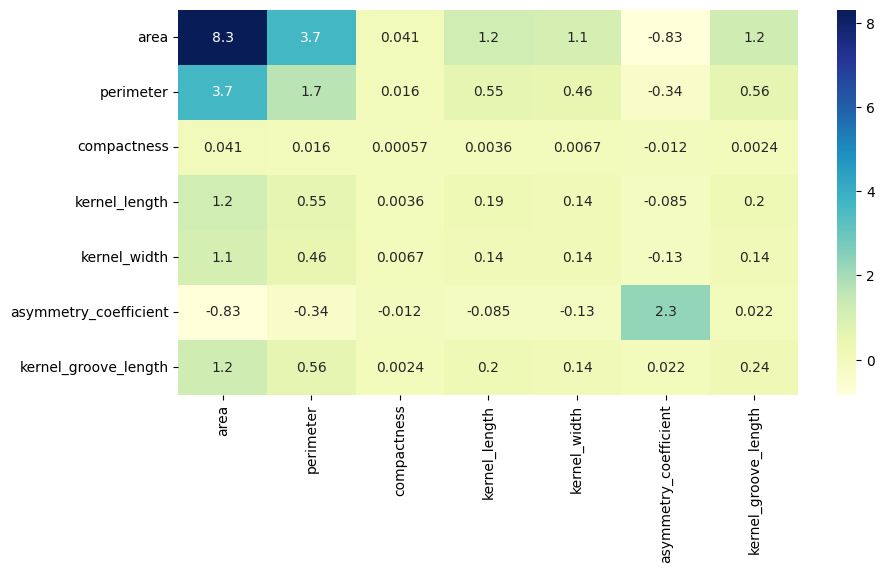

In [ ]:
#  Create a covariance heatmap
plt.figure(figsize = (10, 5), dpi = 100)
sns.heatmap(wheat_features_cov_df, annot = True, cmap = 'YlGnBu')
plt.show()



We can see that `'area'` and `'perimeter'` columns have the highest positive covariance. This shouldn't be surprising because both area and perimeter of any object are highly dependent on each other. So, let's create a scatter plot between them.

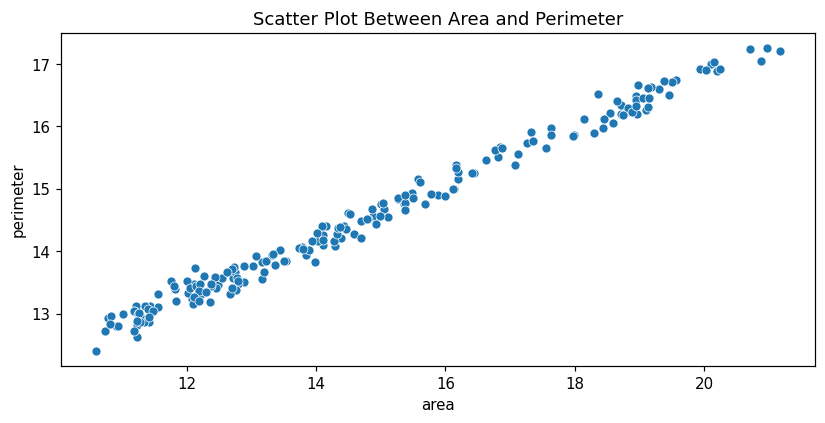

In [ ]:
# Create a scatterplot between area and perimeter.
plt.figure(figsize = (9, 4), dpi = 108)
plt.title("Scatter Plot Between Area and Perimeter")
sns.scatterplot(x = 'area', y = 'perimeter', data = wheat_features)
plt.show()

The above scatter plot confirms that as `area` increases, `perimeter` also increases and vice versa.

The features `'area'` and `'asymmetry_coefficient'` have the greatest negative correlation (`-0.83`). So, let's create a scatter plot between them.

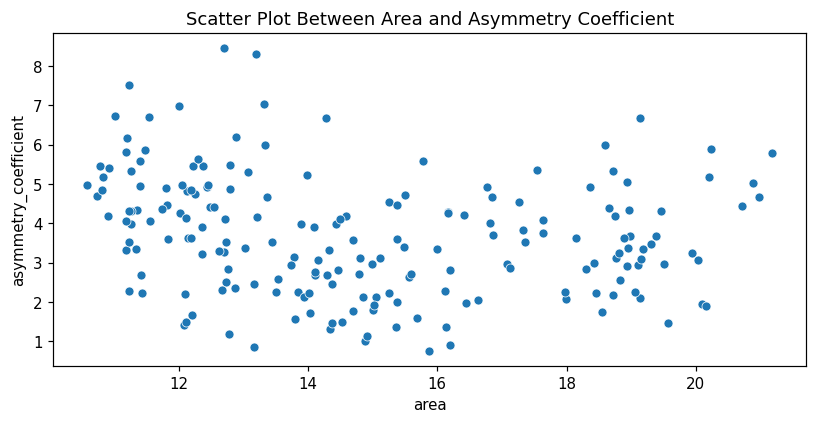

In [ ]:
#  Create a scatterplot between area and asymmetry coefficient.
plt.figure(figsize = (9, 4), dpi = 108)
plt.title("Scatter Plot Between Area and Asymmetry Coefficient")
sns.scatterplot(x = 'area', y = 'asymmetry_coefficient', data = wheat_features)
plt.show()

When the negative covariance is very high, the slope of the straight line that fits the scatters in a plot, has a negative slope.

The above plot isn't the ideal example to understand negative covariance. Hence, let's create new arrays that will have a negative covariance with each other and then plot them through a scatter plot.

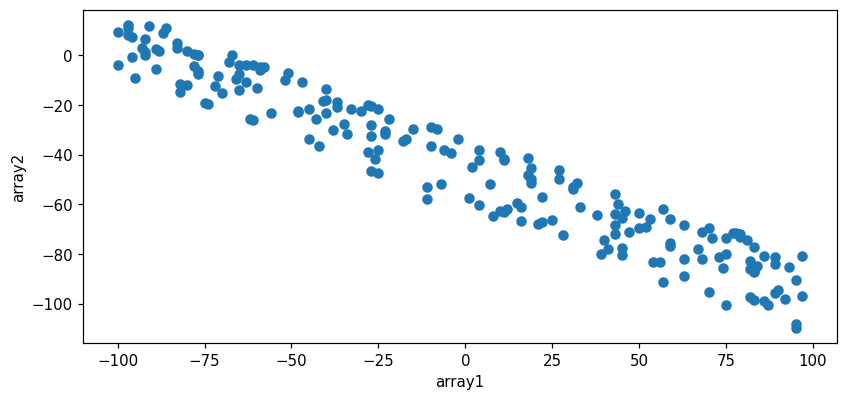

In [ ]:
# Demonstrate negative covariance
array1 = np.random.randint(low = -100, high = 100, size = 194)
array2 =  - (0.5 * array1 + 3 * wheat_features['area'].values)

plt.figure(figsize = (9, 4), dpi = 108)
plt.xlabel("array1")
plt.ylabel("array2")
plt.scatter(array1, array2)
plt.show()

Hence, the above scatterplot demonstrates how negative covariance looks like.

As you can see, much like correlation, covariance too tells the kind of relationship the two variables are having. Let us understand the difference between these two terms.

**Difference Between Covariance and Correlation:**

- **Covariance** indicates the direction of the linear relationship between variables.
- **Correlation**, on the other hand, measures both the strength and direction of the linear relationship between two variables.
- Correlation is a function of covariance.
- Another key difference between them is the fact that correlation values are standardised (lies between $-1$ and $1$) whereas, covariance values are not.

Mathematically, correlation is defined as

\begin{align}
r = \frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)(x_{2i} - \bar x_2)}{\sqrt{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2 \sum_{i = 1} ^N(x_{2i} - \bar x_2)^2}}
\end{align}

Where,

- $r$ is	the correlation coefficient.

- $x_{1i}$ is the value of some $i^{\text{th}}$ sample of the $x_1$ feature in a DataFrame.

- $x_{2i}$ is the value of some $i^{\text{th}}$ sample of the $x_2$ feature in a DataFrame.

- $\bar{x}_1$	is the mean of the values of the $x_1$ feature in a DataFrame.

- $\bar{x}_2$	is the mean of the values of the $x_2$ feature in a DataFrame.

- $N$ is the total number of samples.

Now, on dividing the numerator and denominator of $r$ by $N$, we get

\begin{align}
r = \frac{\frac{1}{N}\sum_{i = 1} ^N (x_{1i} - \bar x_1)(x_{2i} - \bar x_2)}{\frac{1}{N}\sqrt{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2 \sum_{i = 1} ^N(x_{2i} - \bar x_2)^2}}
\end{align}

The numerator in the above expression becomes $\text{cov}(x_1, x_2)$.

\begin{align}
\Rightarrow r = \frac{\text{cov}(x_1, x_2)}{\frac{1}{N}\sqrt{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2 \sum_{i = 1} ^N (x_{2i} - \bar x_2)^2}}
\end{align}

Now, consider the denominator. It becomes:

\begin{align}
\sqrt{\frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2 \sum_{i = 1} ^N (x_{2i} - \bar x_2)^2}{N^2}} \
\Rightarrow \sqrt{ \left( \frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2}{N} \right) \left( \frac{\sum_{i = 1} ^N (x_{2i} - \bar x_2)^2}{N} \right) } \
\Rightarrow \sqrt{ \left( \frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2}{N} \right)} \sqrt{\left( \frac{\sum_{i = 1} ^N (x_{2i} - \bar x_2)^2}{N} \right) }
\end{align}

We already know that:

$$\sqrt{ \left( \frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2}{N} \right)}$$

denotes standard deviation in the values of $x_1$ feature

$$\therefore \sigma_{x_1} = \sqrt{ \left( \frac{\sum_{i = 1} ^N (x_{1i} - \bar x_1)^2}{N} \right)}$$

Similarly,

$$\therefore \sigma_{x_2} = \sqrt{ \left( \frac{\sum_{i = 1} ^N (x_{2i} - \bar x_2)^2}{N} \right)}$$

Therefore, the denominator becomes

$$\sigma_{x_1} \times \sigma_{x_2}$$

So, the correlation expression becomes

\begin{align}
r = \frac{\text{cov}(x_1, x_2)}{\sigma_{x_1} \sigma_{x_2}}
\end{align}

In other words, the correlation is actually **covariance between two features divided by the product of their corresponding standard deviations**.

Now that we have computed the covariance matrix for the wheat kernel dataset, we will proceed to the next step of PCA i.e. computing eigenvectors and eigenvalues.

---

#### Vectors

The next step is to calculate the eigenvectors and eigenvalues. But before that you need to learn about vectors.

**Q:** What is a vector?

**A vector is an object that has magnitude as well as direction**. For example consider the following two statements:

*Statement 1: Nikhil is driving his car at a speed of $6$ Km/hr*

*Statement 2: Nikhil is driving his car towards **East** on M.G. Road at a speed of $6$ Km/hr*

Whenever we attach direction to an object it becomes a **vector**. The figure below illustrates statement 2.

<br>

<center> <img src=https://s3-whjr-v2-prod-bucket.whjr.online/dc952b93-c716-492c-ba50-add03a143fc2.png width=500></center>

The figure above represents **Velocity** of the car.

**Q:** What is Velocity?

**A:** Velocity is a measure of how fast something moves in a particular direction.

Hence, the direction becomes an important factor. Speed is only half the information on velocity and direction is the other half.

The <b><font color ='maroon'>velocity arrow</font></b> (red coloured arrow) or the Velocity vector indicates the direction of the vehicle and the length of the respective arrow indicates the magnitude (i.e. speed of $6$ km/hr).

Hence we can picture a vector as a directed line segment, the length of which determines the magnitude of the vector and arrow indicates the direction. The direction of the vector is always from its tail to its head.

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/758d2ad5-9009-4c38-a341-9575baedec35.png width=500></center>

**Tail** is the starting point of the vector and **Head** is the terminating point of the vector.

<br>

**Vectors in 3-D space:**

Consider an aeroplane taking off from Mumbai airport and flying to New Delhi airport. Here we need to specify $x, y,$ and $z$ coordinates in order to specify its location and velocity.

<center> <img src=https://s3-whjr-v2-prod-bucket.whjr.online/b4e1dcb2-85ab-4a57-aab0-0b132fbadf66.png width=1000></center>

As we know Mumbai is located in the southern part of India relative to New Delhi, we can say that the plane has to fly back to North in order to reach New Delhi airport. During take off say,  the target is to reach a certain height represent by point $B$ from origin which is at Mumbai Airport.








---

#### Activity 2: Vector Representation

Let's see how to define vectors. In above aeroplane example, we had an intermediate point $B$ in the 3-D space, the coordinates of which are:

\begin{align}
B = (-5,1.5,1)
\end{align}

If we draw a vector to this point from origin $A$, the vector can be described as:

\begin{align}
\vec{AB} = \begin{bmatrix}-5\\ 1.5\\ 1 \end{bmatrix}
\end{align}

**Note:** The $\rightarrow$ on $AB$ indicates that the object $AB$ is a vector.

Now let's define this vector by creating a NumPy array.


In [ ]:
#  Create a 3D vector
vector_AB = np.array([-5, 1.5, 1])
print(vector_AB)

Here we see a vector in a 3-dimensional space. We can easily visualise the vectors in $2$ or $3$ dimensions, however vectors can exist in higher dimensions as well.

When we have more than $3$ features in our dataset,  the elements in the array will also increase. For example, considering the wheat kernel dataset:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/2a82f726-ccea-45cd-91ce-b2d8edce8535.png width=900></center>

If we represent row $1$ in vector form it would be a 7-dimensional vector. It can be represented as:

\begin{align}
\vec {X_1} = \begin{bmatrix}14.88\\ 14.57\\ 0.8811\\ 5.554\\ 3.333\\ 1.018\\ 4.956\end{bmatrix}
\end{align}

Let's define this 7-dimensional vector by again creating a NumPy array.


In [ ]:
#  Create a 7-dimensional vector.

vector_X1 = np.array([14.88, 14.57, 0.8811, 5.554, 3.333, 1.018, 4.956])
print('Vector for row 1: ', vector_X1)

So far the vectors we have seen starts from the origin and hence the coordinates becomes the vector. *But what if the starting point is not the origin?*

 If the starting point of the vector is point $A(x_A, y_A)$ and the end point is $B(x_B, y_B)$, then the vector $\vec{AB}$ is represented as:

\begin{align}
\vec{AB} &= \vec{B} - \vec{A} \\
&= (x_B - x_A, y_B - y_A)
\end{align}

Let us take a simple problem statement to understand this:

**Statement**: You start from your home, pick up some burgers from McDonalds and go to your friend's home for a party.

Let us represent this using vectors.

<center> <img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/bf75e1b4-5af7-49b2-b081-a8618f34f4c9.png width=650></center>

The image above describes the problem statement. The coordinates for various locations are:

1. Home $(x_h, y_h) = (0,0)$

2. McD $(x_m, y_m) = (6, 1.5)$

3. Party Location $(x_p, y_p) = (4, 4)$

The vector for Home to McD is calculated as:

\begin{align}
\vec{hm} &= \text{McD} - \text{Home} \\
&= (x_m - x_h, y_m - y_h) \\
&= \begin{bmatrix} 6 - 0 \\ 1.5 - 0 \end{bmatrix} \\
&= \begin{bmatrix} 6\\ 1.5\end{bmatrix}
\end{align}

Similarly, the vector for McD to Party Location is calculated as:

\begin{align}
\vec{mp} &= \text{Party Location} - \text{McD} \\
&= (x_p - x_m, y_p - y_m) \\
&= \begin{bmatrix}4 - 6 \\ 4 - 1.5 \end{bmatrix} \\
&= \begin{bmatrix} -2\\ 2.5\end{bmatrix}
\end{align}

The negative sign indicates that you have to ride the motorbike into another direction to reach your destination.

The same can be calculated using `numpy` module. For this, first define the coordinates for Home, McD, and Party Location as follows:

- `home = array([0, 0])`

- `mcd = array([6, 1.5])`

- `party = array([4, 4])`

Next obtain the respective vectors by subtracting the starting-point coordinates from the ending-point coordinates, Hence:

- $\vec{hm}$ will be calculated as `mcd - home`

- $\vec{mp}$ will be calculated as `party - mcd`


In [ ]:
#Obtaining Vectors from Coordinates

# Define the coordinates
home = np.array([0, 0])
mcd = np.array([6, 1.5])
party = np.array([4, 4])

# Obtain the respective Vectors
hm = mcd - home
mp = party - mcd

print('Vector from Home to McD is: ', hm)
print('Vector from McDonalds to Party Location is: ', mp)

Hence, we calculated the vector $\vec{hm}$  and $\vec{mp}$ by subtracting the starting-point coordinates from the ending-point coordinates.

---

**Vector Magnitude**

Now that we know about vector representation let us see how to calculate magnitude (also referred to as **norm**) of a vector. Recall the vector representation:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/758d2ad5-9009-4c38-a341-9575baedec35.png width=500></center>

Consider a vector starting from point $A = (x_A, y_A)$ and the terminating at point $B = (x_B, y_B)$. The magnitude/norm of a vector $\vec{AB}$ is defined as:

\begin{align}
|\vec{AB}| = \sqrt{(x_B - x_A)^2 + (y_B - y_A)^2}
\end{align}

Similarly consider the above vector $\vec{hm}$:

\begin{align}
\vec{hm} = \begin{bmatrix} 6\\ 1.5\end{bmatrix}
\end{align}

The magnitude of vector $\vec{hm}$ will be calculated as:

\begin{align}
|\vec{hm}| =& \sqrt{(x)^2 + (y)^2} \\
&= \sqrt{6^2 + 1.5^2}  \\
&= \sqrt{36 + 2.25} \\
&= \sqrt{38.25} \\
&= 6.1846
\end{align}

<br>

Similarly, consider an $n^{th}$ dimensional vector represented as:

\begin{align}
\vec V = \begin{bmatrix} x_1 \\ x_2 \\ .. \\ .. \\ .. \\ x_n\end{bmatrix}
\end{align}

The norm of vector $\vec V$ will be calculated as:

\begin{align}
|\vec V| = \sqrt{{x_1}^2 + {x_2}^2 + ..... +{x_n}^2}
\end{align}

For example, the 7-dimensional vector $\vec {X_1}$ represented by:

\begin{align}
\vec {X_1} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \\ x_7 \end{bmatrix} =  \begin{bmatrix}14.88\\ 14.57\\ 0.8811\\ 5.554\\ 3.333\\ 1.018\\ 4.956\end{bmatrix}
\end{align}

The norm of the vector $\vec {X_1}$ will be defined as:

\begin{align}
|\vec {X_1}| &= \sqrt{{x_1}^2 + {x_2}^2 + {x_3}^2 + {x_4}^2 + {x_5}^2 + {x_6}^2 + {x_7}^2} \\
&= \sqrt{14.88^2 + 14.57^2 + 0.8811^2 + 5.554^2 + 3.33^2 + 1.018^2 + 4.956^2} \\
&= \sqrt{221.4144 + 212.2849 + 0.776 + 30.847 + 11.11 + 1.036 + 24.562} \\
&= \sqrt{502.0303} \\
&= 22.406
\end{align}

<br>

The `linalg.norm()` function of `numpy` is used to calculate the norm of vectors. Let us calculate the norm of vector `X1` using this function.

In [ ]:
# Calculate the norm of a vector X1
print('For the vector X1: ', vector_X1)
print('Norm of vector is: ', np.linalg.norm(vector_X1))

---

**Components of a Vector**

Consider a 2-dimensional vector $\vec u$:

\begin{align}
\vec u = \begin{bmatrix} u_x \\ u_y \end{bmatrix} = \begin{bmatrix} 5 \\ 5 \end{bmatrix}
\end{align}

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/13368db4-600d-4571-b20c-e5ca1bc9418d.png width=500></center>

Let's say we are riding our bike along the vector $\vec u$ in the above figure. This means the effective direction in which we are riding will be **North-East**.  This indicates that we would also be moving:

- In the East direction - indicated by $\vec {U_x}$.

- At the same time, in the North direction - indicated by $\vec {U_y}$.

The $\vec {U_x}$ and $\vec {U_y}$ are known as **vector components** or **projections**. Any given $n$-dimensional vector can always be represented by its $n$ components/projections.

**Vector Angle:**

The vector angle gives us a sense of direction for any given vector. In the above figure, the vector angle is indicated as $\theta$. It is the angle a vector makes with the horizontal axis ($x$-axis).

The vector angle $\theta$ can easily be calculated with the help of trigonometry ratios:

\begin{align}
\text{tan} \space \theta = \frac{\text{Perpendicular}}{\text{Base}}
\end{align}

For the vector $\vec u$ this can be written as:

\begin{align}
\text{tan} \space \theta &= \frac{|\vec {U_y|}}{|\vec {U_x}|} \\
&= \frac{5}{5} \\
&= 1 \\
\Rightarrow \theta &= 45^o
\end{align}

<br>

We can also define a vector with the help of its **magnitude** and **angle**.

For the vector $\vec u$, the magnitude be:

\begin{align}
|\vec u| = \sqrt{5^2 +5^2} = \sqrt {25+25} = \sqrt{50} = 7.07
\end{align}

**The vector $\vec u$ can also be represented as:**

\begin{align}
\vec u = \begin{cases} |\vec u| = 7.07 \\ \theta = 45^o \end{cases}
\end{align}


**Q**: How to calculate components of vectors if you are given the above representation?

**A**: We can calculate the components of vectors using trigonometric ratios.

**Trigonometric Ratios:**
The Trigonometry ratios of an angle $\theta$ in a right-angled triangle are defined as:

\begin{align}
\text{sin} \space \theta &= \frac{\text {Perpendicular}}{\text {Hypotenuse}}
\end{align}

\begin{align}
\text{cos} \space \theta &= \frac{\text {Base}}{\text {Hypotenuse}}
\end{align}

For the angle $\theta$ in the above image,

- $\text{Perpendicular} = \vec{u_y}$
- $\text{Base} = \vec{u_x}$
- $\text{Hypotenuse} = \vec{u}$

Thus,

\begin{align}
\text{sin} \space \theta &= \frac{|\vec u_y|}{|\vec u|}
\end{align}

Similarly,

\begin{align}
\text{cos} \space \theta &=  \frac{|\vec u_x|}{|\vec u|}
\end{align}

Hence, if we are given with magnitude of a vector ($|\vec u|$) and angle ($\theta$), we can find the component of the vectors ($|\vec u_x|$ and $|\vec u_y|$) using the above trigonometric ratios.

We will stop here. In the next class, we will learn some vector operations and will proceed to understand Eigenvectors and Eigenvalues.
